# Table of contents
1. [Dataset](#dataset)
2. [Explore Continuous Features](#explore-continuous-features)
3. [Explore Categorical Features](#explore-categorical-features)
4. [Creating And Cleaning Features: Treat Missing Values In The Data](#treat-missing-values)
5. [Creating And Cleaning Features: Cap And Floor Data To Remove Outliers](#remove-outliers)
6. [Creating And Cleaning Features: Transform Skewed Features](#transform-skewed-features)
7. [Creating And Cleaning Features: Create New Features From Text](#text-feature)
8. [Creating And Cleaning Features: Create Indicator](#create-indicator)
9. [Creating And Cleaning Features: Combine Existing Features Into New Feature](#combine-existing-features)
10. [Creating And Cleaning Features: Convert Categorical Features To Numeric](#categorical-features-to-numeric)
11. [Prepare Features For Modeling: Create Training And Test Sets](#create-train-test-set)
12. [Prepare Features For Modeling: Standardize All Features](#standardize-features)
13. [Prepare Features For Modeling: Write Out All Final Datasets](#final-datasets)

### Feature Engineering:  Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model performance on unseen data.



## 1. Dataset - Explore The Data: What Data Are We Using? <a name="dataset"></a>

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class (1st, 2nd, or 3rd)
- **Sex** (str) - Gender of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### Read In Data

In [1]:
# Read in the data from the data folder
import pandas as pd
import numpy as np
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Check the number of rows and columns in the data
titanic.shape

(891, 12)

In [3]:
# Check the type of data stored in each column
titanic.dtypes
# we see that we have 5 categorical variables and rest of the 7 are numerical

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
# See the distribution of our target variable
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Note:** So in machine learning terms, we can say that we have a semi-imbalanced target class in the sense that it's not a 50-50 split. We have more zeros in this data than we have one. So in our example, about 38% of the rows are what we call positive cases, or the thing we want to predict. It is not uncommon for that number to be less than 1% in other machine learning applications. Think about fraud detection as an example. What percent of real transactions do you think are fraudulent? Far less than 1%. When you have that kind of **class imbalance**, it can be difficult for the model to pick up on the signal in those positive cases, because it's drowned out by the negative cases. In that scenario, you need to make adjustments so your model could better pick up on the signal in the data for both classes. The easiest **most common adjustment is simply down sampling the negative or the majority class.** 

## 2. Explore The Data: Explore Continuous Features <a name="explore-continuous-features"></a>

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

In [5]:
from scipy import stats

# Drop all categorical features since we are focussing on continuous features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


### Explore Continuous Features

In [6]:
# Look at the general distribution of these features
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation1:** Missing values in Age as we see the count is 714

**Observation2:** Our target variable Survived is binary

**Observation3:** Sibsb, Pclass and Parch have limited range of values

In [7]:
# Looking at the correlation matrix tells us 2 things:
## 1. How are features correlated with the target variable?
## 2. How are features correlated with each other?
titanic.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Note:** We want the absolute value of the correlation between features and the thing you're trying to predict to be quite high. Keep in mind a strong negative correlation is just as useful as a strong positive correlation. We just don't want the correlation to be close to zero. Secondly, we want to know how correlated a certain feature is with all the other features. We want the correlation with other features to be low. When the features are correlated with each other, sometimes it can confuse the model because the model can't quite parse out which feature the signal is coming from.

**Observation:** So looking at the Survived column, you can see that Pclass and Fare have the strongest correlation here. So that gives us an idea that those two features might be useful in making predictions. However, you'll also notice that Fare and PClass have the strongest correlation between features. Remember negative correlation is still correlation. So as Fare increases Pclass decreases, which makes sense. As you go from third class to second class to first class, fare is going to go up. 

In [8]:
# Look at the average value of each feature based on whether Age is missing
# check whether the values are missing at random or in a systematic way
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


**Observation:** We'll call titanic.groupby, and what we're going to group by is the age feature, and then we're going to call this is null method, and this is null method will just return true or false based on whether the age is missing or not. Then what we're going to do is we're going to call mean, and what that'll do is it'll return the mean value of each of the other features depending on whether age is missing or not. And what we're looking for here is a significant difference in any of the features, depending on whether age was missing or not. And just to emphasize true and false means whether age was missing or not. **So true means it was missing, false means it was not missing. So we notice that there does seem to be some splitting here. For instance, people without age reported were a little less likely to survive, had a slightly higher class number, fewer parents and children, and a lower fare.** 

## 3. Explore The Data: Explore Categorical Features <a name="explore-categorical-features"></a>


**This section focuses on exploring the `Name`, `Sex`, `Ticket`, `Cabin`, and `Embarked` features.**

In [9]:
# Drop all continuous features
titanic = pd.read_csv('titanic.csv')
cont_feat = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


### Explore Categorical Features

In [10]:
# Check if there are any missing values
titanic.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

**Observation:** So we can see here there's a lot of missing values for Cabin. About 75% of the passengers have cabin missing.

In [11]:
# Explore the number of unique values for each feature
for col in titanic.columns:
    print('{}: {} unique values'.format(col, titanic[col].nunique()))

Survived: 2 unique values
Name: 891 unique values
Sex: 2 unique values
Ticket: 681 unique values
Cabin: 147 unique values
Embarked: 3 unique values


**Observation:** So of course, we already know that there's only two unique values for Survived, but for the rest of the features, we can probably break them into two groups. The first group has very few unique features. So that would include sex and the port that a passenger embarked from. And then the second group has a lot of unique values, so that would be name, ticket and cabin. So let's treat these separately and we'll start with Sex and Embarked.  

A very easy way to see the relationship with the target variable is to group by each feature, and then just look at the average value of the target variable. Again, since the target is ones or zeros, taking the average of that field will just tell you the percent of rows that are a one, or the percent of passengers in that group that survived.

In [12]:
# Check survival rate by gender
titanic.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


**Observation:** 74% of females survived while only 18% of male survived, seems like that could be a really strong feature in our model.  

In [13]:
# Check survival rate by the port departed from
titanic.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [14]:
# Is Cabin missing at random?
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


**Observation:** over 66% of people who had non missing cabin values survived while less than 30% of those who had a missing cabin value survived. Again, when we looked at age, we're trying to determine if a missing value means anything, and we found that it doesn't. But in this case, **whether cabin is missing is a very strong indicator of whether somebody would survive or not.**

Typically, if you see a field that has a missing value for 687 out of the 891 rows, you'll probably just drop that whole column because it's not offering a lot of value when almost three quarters of your examples have missing values. But our exploration uncovered a tremendous source of value for the model. **Now, one hypothesis might be that people without an assigned cabin literally didn't have a cabin and that's why so few survived.** But ultimately the reason doesn't really matter so much as our treatment of this feature. In this case, a missing value for cabin means something. So when we get to the modeling phase, we're going to define an indicator variable to indicate whether a passenger had a cabin or not.

In [15]:
# Look at unique values for the Ticket feature
titanic['Ticket'].value_counts()

CA. 2343              7
1601                  7
347082                7
CA 2144               6
347088                6
3101295               6
S.O.C. 14879          5
382652                5
19950                 4
W./C. 6608            4
349909                4
4133                  4
LINE                  4
113760                4
PC 17757              4
2666                  4
347077                4
113781                4
17421                 4
248727                3
110152                3
110413                3
PC 17582              3
PC 17760              3
PC 17572              3
29106                 3
363291                3
24160                 3
PC 17755              3
347742                3
                     ..
STON/O 2. 3101285     1
236852                1
315090                1
349225                1
373450                1
2680                  1
350029                1
3474                  1
2671                  1
11774                 1
2003            

**Observation:** So we don't really see anything that's jumping out here. We have a few numbers that appear six or seven times, but they don't seem to really mean anything. So Ticket appears to be assigned at random, so we'll likely end up dropping that feature.  

Now **Name itself should not really have any influence on whether a person survived or not.** However, if you look at the Name field, there are a lot of titles included. These titles might provide some signal as it might imply status, which could be correlated with their likelihood of surviving.

In [16]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,Mrs
4,0,"Allen, Mr. William Henry",male,373450,NaN,S,Mr


In [17]:
# Look at survival rate by title
titanic.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

**Observation:** you can mostly ignore most of the titles with less than 10 counts, and that's why we included count. And for the rest, you can see that they mostly aligned with the takeaways that we saw with gender, but this is just slightly more granular. You can see that the outlier here is Master, where it's primarily male and they survive at a 57% rate.  

## 4. Creating And Cleaning Features: Treat Missing Values In The Data <a name="treat-missing-values"></a>

Three primary methods to treat missing values:
1. Impute to the median or mean of the feature
2. Model that feature to predict the missing values
3. Assign it some default value (`Other` or `-999`) (only applies to missing values that appear at random)

In [18]:
titanic = pd.read_csv('titanic.csv')

# Check where we have missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Fill Missing For `Age`
This way, it satisfies the model by making sure we have a value in there, but by replacing it with the average value, it's not biasing the model towards one outcome or another, because the age value will just be average it will rely on the other features to try to indicate whether the given person survived or not.  

In [19]:
# Fill in missing values for the Age feature
titanic['Age_clean'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [20]:
# Take a look at the data one more time
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,29.699118
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.000000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.000000
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000


### Fill Missing For `Embarked`
Since embarked is a categorical feature with possible values of C, Q or S. We're just going to add another value 'o' to indicate that the value was missing

In [21]:
# Fill in missing values for the Embarked feature
titanic['Embarked_clean'] = titanic['Embarked'].fillna('O')
titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

## 5. Creating And Cleaning Features: Cap And Floor Data To Remove Outliers <a name="remove-outliers"></a>
Here we're going to remove outliers in our data. Again, this is to make sure our model is fitting to the actual trends in our data and not chasing down those outliers. Now typically, this is called capping to remove outliers on the high end and flooring to remove outliers on the low end. But in this case, we're just going to be capping our features, because none of our features could have outliers on the low end. 

In [22]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


### Remove Outliers

In [23]:
# See where outliers might be an issue
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


**Note:** Now, it's worth noting that **we're only looking for outliers in one dimensional space in this exercise**. In other words, we know that fare and passenger class are correlated. As passenger class goes down, fare goes up. So in this exercise, we could see a passenger that had a fare of 50, and that would be high, but not high enough to be considered an outlier based on the distribution of fare. However, if that fare of 50 was for a third-class passenger, that would likely be an outlier in two-dimensional space as we expect third-class passengers to be on the low range of the distribution of fare. So that's an example of a data point that would be considered an outlier in two-dimensional space but it would not be in one-dimensional space. And again, we will be focusing just on outliers in one-dimensional space for now. **So we can see the max values for fare and age might be a little extreme, but the rest seem okay, but that's not really a thorough analysis.**

In [24]:
def detect_outlier(feature):
    outliers = []
    data = titanic[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

So we know that passenger class cannot exceed three. So we're going to ignore that feature for now, but let's look at age, siblings and spouses, parents and children, and fare. For each, we'll take the full distribution of values. Then we'll set thresholds to identify outliers that exceed those given thresholds. The thresholds we'll set will be at the 95th percentile, 99th percentile, and three standard deviations above the mean is a commonly used threshold to identify outliers. And if it is, then we'll assign it to our list of outliers.

We have another method also to remove outliers. If a value is greater than 1.5*(IQR) it is considered an outlier. IQR is interquartile range ie difference between the 75th and the 25th percentiles of the data. You can read about these approaches in detail here:
https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [25]:
# Determine what the upperbound should be for continuous features
for feat in ['Age_clean', 'SibSp', 'Parch', 'Fare']:
    detect_outlier(feat)


Outlier caps for Age_clean:
  --95p: 54.0 / 42 values exceed that
  --3sd: 68.7 / 7 values exceed that
  --99p: 65.0 / 8 values exceed that

Outlier caps for SibSp:
  --95p: 3.0 / 30 values exceed that
  --3sd: 3.8 / 30 values exceed that
  --99p: 5.0 / 7 values exceed that

Outlier caps for Parch:
  --95p: 2.0 / 15 values exceed that
  --3sd: 2.8 / 15 values exceed that
  --99p: 4.0 / 6 values exceed that

Outlier caps for Fare:
  --95p: 112.1 / 45 values exceed that
  --3sd: 181.2 / 20 values exceed that
  --99p: 249.0 / 9 values exceed that


**Observation:**  Now just looking at the results, since there's not too many really extreme outliers, I'm just going to use the 99th percentile to just cap the top five or 10 most extreme values. With that said, from when we called describe, we can see that the max for sibsp and sand parch are eight and six, which is pretty reasonable.  

So there's probably no good reason to cap them at four and five, so let's leave those alone, and we'll just cap age and fare in.

In [26]:
# Cap features
titanic['Age_clean'].clip(upper=titanic['Age_clean'].quantile(.99), inplace=True)
titanic['Fare_clean'] = titanic['Fare'].clip(upper=titanic['Fare'].quantile(.99))

In [27]:
# Describe the dataframe again to make sure the capping was successful
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


## 6. Creating And Cleaning Features: Transform Skewed Features <a name="transform-skewed-features"></a>
So skewed data can be problematic because the model will go chasing the long tail instead of focusing on where the bulk of the data is. So removing outliers can shorten that tail by removing extreme values. But transforming your data can change the shape of that distribution altogether, making it a more compact, easily understood distribution.

### Read In Data

In [28]:
# Read in data

import matplotlib.pyplot as plt
import scipy.stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
%matplotlib inline

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500


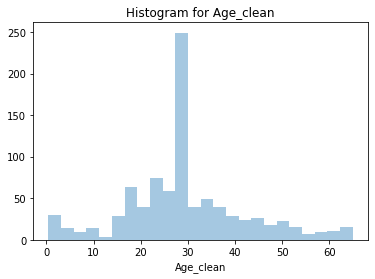

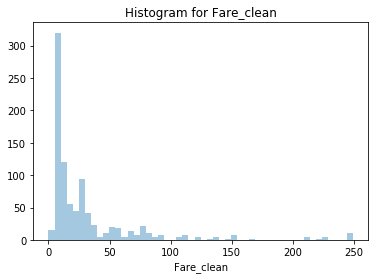

In [29]:
# Plot histogram for each continuous feature to see if a transformation is necessary
# we need to see if either features are even skewed
for feature in ['Age_clean', 'Fare_clean']:
    sns.distplot(titanic[feature], kde=False)
    plt.title('Histogram for {}'.format(feature))
    plt.show()

**Observation:** So you can see the **age** outside of the spike caused from filling all of our missing values with a mean of 28 **is pretty well behaved. It's pretty compact without any really long tails. However, you see fare is heavily concentrated under around 40, but it has a very long tail**. And you can see that capping the outliers did help a little bit. As previously, this tail extended all the way over 500. So capping it brought the tail in a little bit, but it's still pretty long. Let's explore some potential transformations to try to pull that tail in, and make this a more compact, well-behaved distribution.  

**A transformation is a process that alters each data point in a certain feature in a systematic way that makes it cleaner for the model to use.** For instance, that could mean squaring each value, or taking the square root of each value in a given feature. **So we saw that fare has that long right tail. Then the distribution would aim to pull that tail end to make it a more compact distribution, so the model doesn't get distracted chasing this tail**. The series of transformations we'll be working with are called Box-Cox power transformations. This is a common type of transformation. The base form of this type of transformation is y to the x power, where y is the value of the feature and x is the exponent of the power transformation to apply. So you'll notice that this table shows some common power transformations using exponents from negative two up to positive two. So in the first line of this table, an exponent of negative two means that translates to y to the negative two, which is the same as one over y squared.  

### Box-Cox Power Transformation

**Base Form** $$ y^x $$

| X    | Base Form           |           Transformation               |
|------|--------------------------|--------------------------|
| -2   | $$ y ^ {-2} $$           | $$ \frac{1}{y^2} $$      |
| -1   | $$ y ^ {-1} $$           | $$ \frac{1}{y} $$        |
| -0.5 | $$ y ^ {\frac{-1}{2}} $$ | $$ \frac{1}{\sqrt{y}} $$ |
| 0    | $$ y^{0} $$              | $$ log(y) $$             |
| 0.5  | $$ y ^ {\frac{1}{2}}  $$ | $$ \sqrt{y} $$           |
| 1    | $$ y^{1} $$              | $$ y $$                  |
| 2    | $$ y^{2} $$              | $$ y^2 $$                |

**Example (Using Fare)**

| Original value    | Transformation           |           Transformation               |
|------|--------------------------|--------------------------|
| $$ 50 $$    | $$ \frac{1}{50^2} $$           |  $$ 0.0004 $$      |
| $$ 50 $$    | $$ \frac{1}{50} $$          | $$ 0.02 $$        |
| $$ 50 $$  | $$ \frac{1}{\sqrt{50}} $$ | $$ 0.14 $$ |
| $$ 50 $$     | $$ log(50) $$              | $$ 1.7 $$             |
| $$ 50 $$   | $$ \sqrt{50} $$ | $$ 7.07 $$           |
| $$ 50 $$     | $$ 50 $$              | $$ 50 $$                  |
| $$ 50 $$     | $$ 50^2 $$           | $$ 2500 $$                |

**Process**

1. Determine what range of exponents to test
2. Apply each transformation to each value of your chosen feature
3. Use some criteria to determine which of the transformations yield the best distribution

Today, we'll be using the following two criteria. **The first is something called QQ plots.** The details of this plot are outside the scope of this course. But basically, a perfect distribution would mean all of the points in this plot would end up in a straight line from the bottom left up to the top right. **Secondly, we'll be looking at a histogram with a normal distribution curve overlaid**. With this, we want our histogram of actual data to approximate the curve that represents a normal distribution given the mean and standard deviation of the actual data.

Have a look at this link for more on QQplots: https://math.illinois.edu/system/files/inline-files/Proj9AY1516-report2.pdf

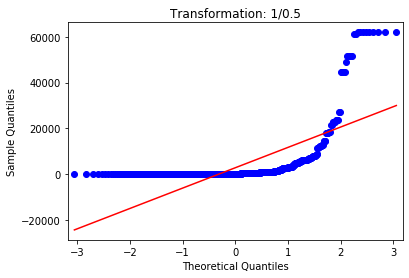

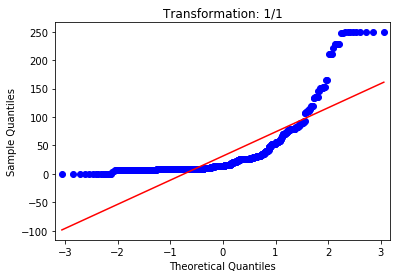

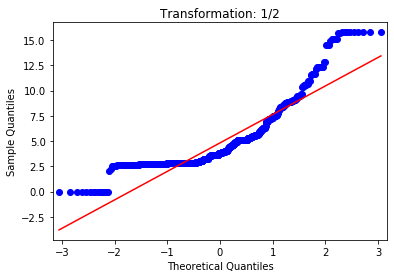

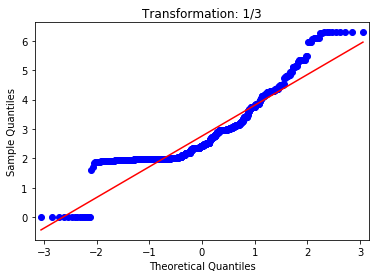

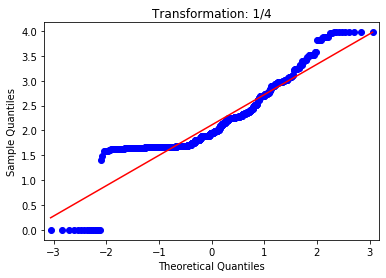

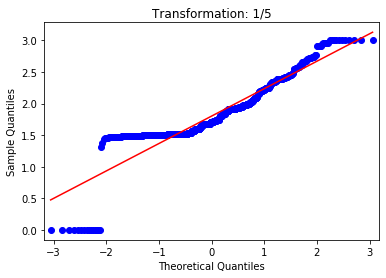

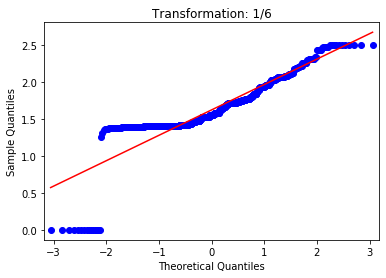

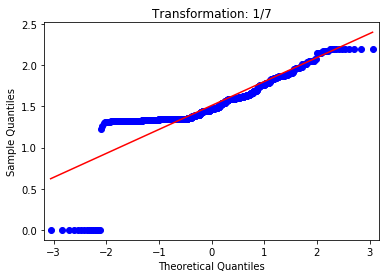

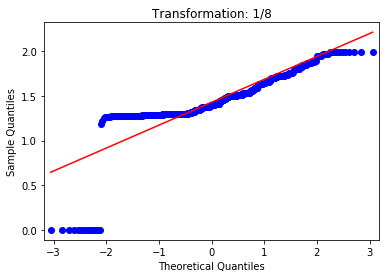

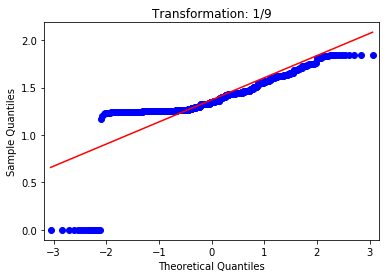

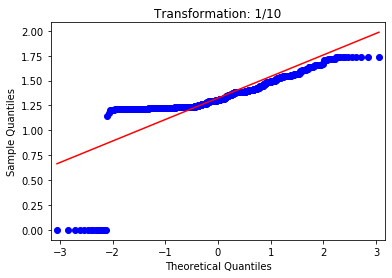

In [30]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = titanic['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

**Observation:** Now, What we would like to see here is these blue dots line up with this red line. And you could see that clearly for the case of y squared, that's not the case. For the raw values, it's still not the case. And then you get to the square root of the raw values. And you can see that things are starting to get a little bit more well-behaved. **Maybe somewhere around a power transformation of one over five or one over six looks a little bit better than our raw values or our squared values.** So that just gives us some idea of the direction that we want to head here. 

**So for the histograms let's reduce our range from 0.5 to 10, down to three to seven. Since everything outside of that did not really seem like a reasonable option.**

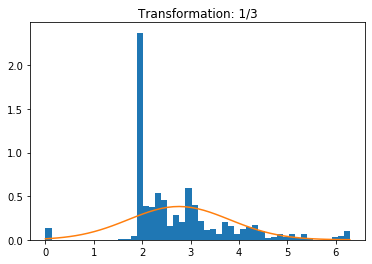

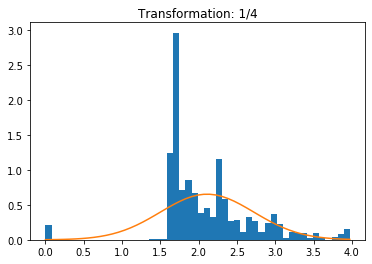

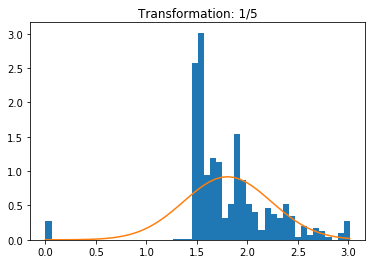

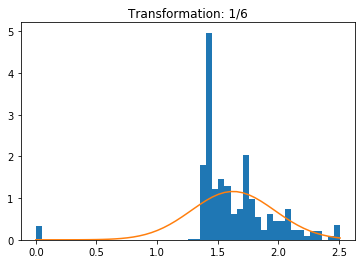

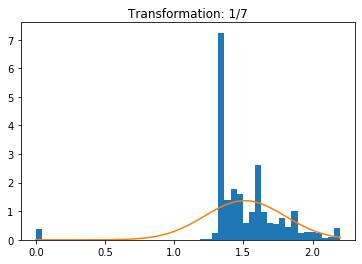

In [31]:
# Box-Cox transformation
for i in [3, 4, 5, 6, 7]:
    data_t = titanic['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

**Observation:** We want the shape of our histogram to approximate the shape of our normal curve. So in the output and as we start to scroll through these, again, **you'll notice that none of these are perfect. Probably any of them are reasonable choices at this point, they're all better than our raw data. But let's just go with one over five.** So again, you can see that this distribution is much more compact now. So we don't have to worry about a model trying to chase down values in a very long tail.  

In [32]:
# Create the new transformed feature
titanic['Fare_clean_tr'] = titanic['Fare_clean'].apply(lambda x: x**(1/5))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


## 7. Creating And Cleaning Features: Create New Features From Text <a name="text-feature"></a>

Now, in the field of Natural Language Processing, you can actually learn new features from text using a tool like WordtoVec. However, our problem doesn't really lend itself to that type of feature learning. **Previously, we learned that the name feature probably isn't all that useful. Person's name likely had no influence on whether they survived.** Based on that, in many cases, people might just throw away this feature. **However, we explored the feature, realized that we could parse out a person's title, and use that in the model. So in this part, we're going to add that title feature to our data.**

In [33]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606


### Create New Title Feature

In [34]:
# Create a title feature by parsing passenger name
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


## 8. Creating And Cleaning Features: Create Indicator <a name="create-indicator"></a>

Recall when we looked at the **cabin feature** previously. We saw that it was **missing for over 75% of passengers**. It would have been easy to assume it was just a recording error. And because that information was missing for so many passengers, it wouldn't be terribly useful for the model. But **we dug a level deeper and found a strong correlation between survival rate and whether the cabin feature is missing or not**. This could lead to many different hypotheses. But the important part is that **we know there's value there and we want to make it very clear to the model whether this passenger had a cabin number or not. We can do that by creating a very simple binary indicator variable.**

In [35]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr


### Create Indicator Variable For `Cabin`

If you group by whether the cabin feature is missing or not, and then take the mean of the survive column, you'll see that under 30% of passengers whose cabin is missing survive while two-thirds of the people who did have a cabin survived. That's pretty significant. So again, let's capture that missing-ness as clearly as possible for the model.  

In [36]:
# What would an indicator variable for Cabin look like?
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [37]:
# Create indicator feature
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

**Note:** So again, this will just return a boolean for whether cabin is missing or not. And we'll say if it is missing, return a zero. If it's not missing, return of one. And then we just need to store this as a new feature. And we'll call it Cabin_ind. So again, this will just indicate whether they did have a cabin, which will show up as a one in the data or they did not have a cabin, which will show up as a zero.

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


## 9. Creating And Cleaning Features: Combine Existing Features Into New Feature <a name="combine-existing-features"></a>

Recall when we were exploring our continuous features, we noticed that the feature that indicates the number of siblings and spouses aboard had the same relationship to our target variable as the feature that indicates the number of parents and children aboard. It makes sense then that we could combine these two features into a single feature that indicates the number of immediate family members aboard.

In [39]:

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


### Combine `SibSp` & `Parch` Into New `Family_cnt` Feature

As a reminder of what the relationships look like for these two features, let's create these categorical plots again

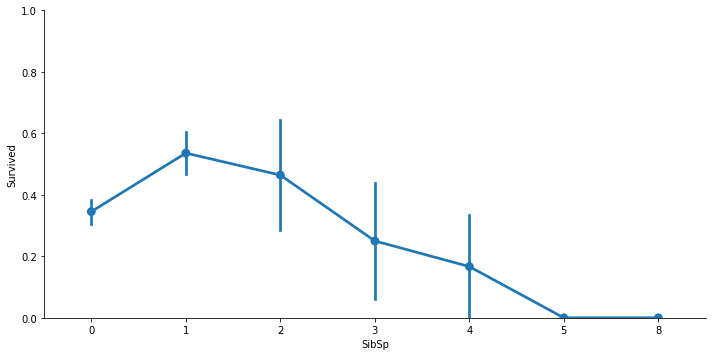

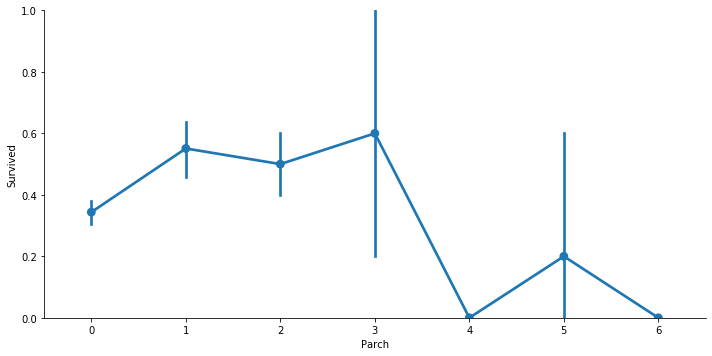

In [40]:
# Generate categorical plots for ordinal features
for col in ['SibSp', 'Parch']:
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )
    plt.ylim(0, 1)

**Observation:** the general relationship here is the same. And that kind of makes sense. If there are more people onboard that you care about, you may be less likely to survive yourself because you're looking out for those family members. So let's try to encode that takeaway in a single feature. So we'll just add these two features and then we'll store that as family count.

(0, 1)

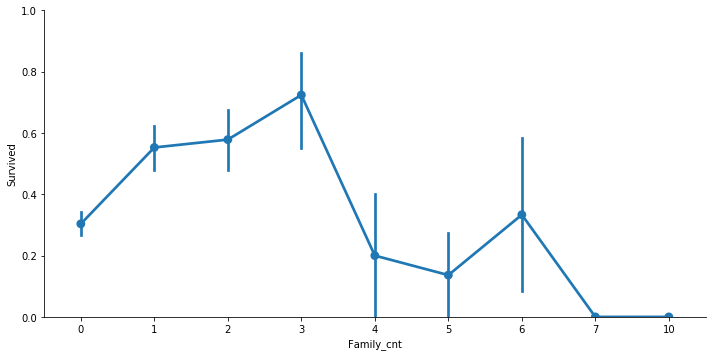

In [41]:
# Create a new family count feature
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='Family_cnt', y='Survived', data=titanic, kind='point', aspect=2, )
plt.ylim(0, 1)

**Observation:** So again, we noticed this previously. It's a little bit bumpy. And we noticed a big drop-off after a family count of three. The story isn't perfectly clean here unfortunately, but in real world-data, the story is almost never perfectly clean. 

Now, It's rare that you know for sure whether a feature will be powerful or not. As I mentioned previously, we're running through this pipeline in a very linear manner. But it's often cyclical. So maybe you define this feature, you go to the modeling phase, and realize that the model more easily picks up on the pattern with two separate features. So then you would just drop this feature and revert back to the two original features. But that's why we're keeping all the features in our dataset, to give us options.

## 10. Creating And Cleaning Features: Convert Categorical Features To Numeric <a name="categorical-features-to-numeric"></a>

Now, you know that Python does not inherently know what any word represents. It just sees a string of characters. NLP is actually the process of teaching a computer to understand and analyze human language. For machine learning, we encounter a similar problem. A machine learning model does not know the difference between male and female. In fact, a machine learning model doesn't even want to see those strings. It wants to see numbers so it can learn the relationships between those numbers and whatever it's trying to predict. It's worth noting, the numbers do not necessarily indicate an order. It just gives Python the tools to use that feature in fitting a model. **So when you have categorical features like we have, you'll want to convert them to a numeric feature**. One easy way to do that is use the label encoder from sklearn. This function will basically learn all the distinct values that a given feature could have. So for sex, it would just be male and female in this data set, and then it would convert it to a number. So now maybe male is one and female is now a zero.  

In [42]:
from sklearn.preprocessing import LabelEncoder

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0,0


### Convert Categorical Features To Numeric

In [43]:
# Convert categorical features to numeric levels
for feature in ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']:
    le = LabelEncoder()
    titanic[feature] = le.fit_transform(titanic[feature].astype(str))
    
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


### So now these features are prepared to be passed into a machine learning model to learn the relationships between these features and the target variable. Lastly, we're going to create the final data sets we'll be using for our modeling. 

## 11. Prepare Features For Modeling: Create Training And Test Sets <a name="create-train-test-set"></a>

In [44]:

from sklearn.model_selection import train_test_split

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2,35.0,3,53.1000,2.213191,12,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2,35.0,3,8.0500,1.517606,11,0,0


### Split Into Train, Validation, And Test Set

We're going to split up our full data set so we have 60% of our examples in the training set, 20% in the validation set, and 20% in the test set. We do this so that we can evaluate the performance of the model on data it has never seen before. Now remember our definition for machine learning. The entire goal is for the model to learn from examples, and then generalize those learnings to unseen data. So this splitting of our data will help us evaluate the models and perform model selection using unbiased results.

In [45]:
# Drop unnecccessary features and split into training/test sets
# this is our complete data set with all of our raw, clean and created features.  
features = titanic.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


In [46]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## 12. Prepare Features For Modeling: Standardize All Features <a name="standardize-features"></a>

We talked about how if your features are on different scales, it may be helpful to scale or normalize your data so all of the features are on the same scale. 

In [47]:

from sklearn.preprocessing import StandardScaler

titanic_train = X_train
titanic_val = X_val
titanic_test = X_test
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,2,1,62.0,0,0,10.5000,147,2,62.0,3,10.5000,1.600434,11,0,0
787,3,1,8.0,4,1,29.1250,147,1,8.0,2,29.1250,1.962697,7,0,5
74,3,1,32.0,0,0,56.4958,147,2,32.0,3,56.4958,2.240801,11,0,0
113,3,0,20.0,1,0,9.8250,147,2,20.0,3,9.8250,1.579307,8,0,1
635,2,0,28.0,0,0,13.0000,147,2,28.0,3,13.0000,1.670278,8,0,0


**Observation:** So you can see in our data that features are clearly on different scales. For instance, fare and age are relatively big numbers, whereas cabin indicator is zero or one and embarked a zero, one, or two.  

### Standardize Features

In [48]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(titanic_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
# Scale the training, test, and validation sets
features = titanic_train.columns

titanic_train[features] = scaler.transform(titanic_train[features])
titanic_val[features] = scaler.transform(titanic_val[features])
titanic_test[features] = scaler.transform(titanic_test[features])

titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
787,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
74,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
113,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
635,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


 **Note:** So essentially we'll replace the original with the scaled data. And just as a reminder, what it's doing here is for each feature it's taking the mean and standard deviation that it learned on the training data and it's using that to transform each value for that feature in the training, validation, and test sets. Now you can see that these are roughly all on the same scale, where the numbers are representing the number of standard deviations above or below the mean value for that given feature. Now with all this data on the same scale, some algorithms will train more quickly, and some will even perform better. So this is a great skill to have in your toolbox. 

## 13. Prepare Features For Modeling: Write Out All Final Datasets <a name="final-datasets"></a>

#### Now that we've done all the work of exploring this data, cleaning our features, transforming the features, and creating new features, it would be useful to understand the value of the work that we've done. so, we're going to take four different sets of features, build a model on each, and then compare the performance to understand the value of the work that we've done throughout this lecture.

In [50]:
titanic_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
570,-0.408652,0.737125,2.258185,-0.464063,-0.468427,-0.412724,0.450064,0.573494,2.570771,0.545364,-0.483840,-0.446199,0.430223,-0.544166,-0.540385
787,0.803682,0.737125,-1.469145,2.692745,0.794906,-0.066661,0.450064,-0.718682,-1.673694,-0.334468,-0.046993,0.373863,-1.784129,-0.544166,2.277639
74,0.803682,0.737125,0.187446,-0.464063,-0.468427,0.441904,0.450064,0.573494,0.212735,0.545364,0.594986,1.003414,0.430223,-0.544166,-0.540385
113,0.803682,-1.356623,-0.640849,0.325139,-0.468427,-0.425266,0.450064,0.573494,-0.730480,0.545364,-0.499672,-0.494025,-1.230541,-0.544166,0.023220
635,-0.408652,-1.356623,-0.088652,-0.464063,-0.468427,-0.366273,0.450064,0.573494,-0.101670,0.545364,-0.425203,-0.288093,-1.230541,-0.544166,-0.540385


**Raw Original Features:** - Now this will answer the question, what if we just didn't touch our features at all other than the required step of converting categorical features to numeric? This set contains all the original features we had in our data when we started

**Cleaned original features:** - So this is just a set of original features with the minimum cleaning applied, like filling in missing values, and outlier removal.

**All features:** - And this is going to be the clean diversion of our original features plus the new features that we've created. So that's cabin indicator, title, and family count.

**Reduced features:** - And this is going to be a set of features that throughout our analysis, we found to be the most useful in predicting whether somebody survived. So that will be passenger class, sex, cleaned age, family count, transformed fare, cabin indicator, and title.  

In [51]:
# Define the list of features to be used for each dataset
raw_original_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                         'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean',
                             'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_tr',
                'Cabin', 'Cabin_ind', 'Embarked_clean', 'Title', 'Family_cnt']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_cnt', 'Fare_clean_tr',
                    'Cabin_ind', 'Title']

### Write Out All Data

In [52]:
# Write out final data for each feature set

titanic_train[raw_original_features].to_csv('data/train_features_raw.csv', index=False)
titanic_val[raw_original_features].to_csv('data/val_features_raw.csv', index=False)
titanic_test[raw_original_features].to_csv('data/test_features_raw.csv', index=False)

titanic_train[cleaned_original_features].to_csv('data/train_features_original.csv', index=False)
titanic_val[cleaned_original_features].to_csv('data/val_features_original.csv', index=False)
titanic_test[cleaned_original_features].to_csv('data/test_features_original.csv', index=False)

titanic_train[all_features].to_csv('data/train_features_all.csv', index=False)
titanic_val[all_features].to_csv('data/val_features_all.csv', index=False)
titanic_test[all_features].to_csv('data/test_features_all.csv', index=False)

titanic_train[reduced_features].to_csv('data/train_features_reduced.csv', index=False)
titanic_val[reduced_features].to_csv('data/val_features_reduced.csv', index=False)
titanic_test[reduced_features].to_csv('data/test_features_reduced.csv', index=False)

### Move Labels To Proper Directory

In [53]:
# Read in all labels
titanic_train_labels = y_train
titanic_val_labels = y_val
titanic_test_labels = y_test

In [54]:
# Double-check the labels
titanic_train_labels.head()

570    1
787    0
74     1
113    0
635    1
Name: Survived, dtype: int64

In [55]:
# Write out labels to final directory
titanic_train_labels.to_csv('data/train_labels.csv', index=False)
titanic_val_labels.to_csv('data/val_labels.csv', index=False)
titanic_test_labels.to_csv('data/test_labels.csv', index=False)

C:\Users\archi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
C:\Users\archi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\archi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
